# Cleaning Symptoms


In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the VAERS Data (Demographics and Event Information)
sym_df = pd.read_csv('../Data/VAERSSYMPTOMS.csv', low_memory=False)

In [4]:
sym_df.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,902418,Hypoaesthesia,24.0,Injection site hypoaesthesia,24.0,NaN,NaN,NaN,NaN,NaN,NaN
1,902440,Headache,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,902446,Erythema,23.1,Feeling hot,23.1,Flushing,23.1,NaN,NaN,NaN,NaN
3,902464,Dizziness,23.1,Electrocardiogram normal,23.1,Hyperhidrosis,23.1,Laboratory test normal,23.1,Presyncope,23.1
4,902465,Dysgeusia,23.1,Oral pruritus,23.1,Paraesthesia,23.1,Paraesthesia oral,23.1,Parosmia,23.1


In [5]:
sym_df.columns

Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

In [6]:
#Drop Irrelevant Columns

sym_df = sym_df.drop(['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'], axis=1)

In [7]:
sym_df.head(20)

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,902418,Hypoaesthesia,Injection site hypoaesthesia,NaN,NaN,NaN
1,902440,Headache,NaN,NaN,NaN,NaN
2,902446,Erythema,Feeling hot,Flushing,NaN,NaN
3,902464,Dizziness,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope
4,902465,Dysgeusia,Oral pruritus,Paraesthesia,Paraesthesia oral,Parosmia
5,902465,Sensory disturbance,Tremor,NaN,NaN,NaN
6,902468,Chest discomfort,Chills,Defaecation urgency,Diarrhoea,Dizziness
7,902468,Dyspnoea,Feeling abnormal,Flushing,Presyncope,NaN
8,902479,Chest pain,Feeling abnormal,Flushing,Intensive care,NaN
9,902490,Headache,Pain,NaN,NaN,NaN


In [8]:
# Drop rows where SYMPTOM1 is NaN
sym_df = sym_df.dropna(subset=['SYMPTOM1'])

# Replace remaining NaN values with NULL (represented as None in pandas for SQL compatibility)
sym_df = sym_df.replace({np.nan: None})

In [9]:
sym_df

,VAERS_ID,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
0,902418,Hypoaesthesia,Injection site hypoaesthesia,None,None,None
1,902440,Headache,None,None,None,None
2,902446,Erythema,Feeling hot,Flushing,None,None
3,902464,Dizziness,Electrocardiogram normal,Hyperhidrosis,Laboratory test normal,Presyncope
4,902465,Dysgeusia,Oral pruritus,Paraesthesia,Paraesthesia oral,Parosmia
...,...,...,...,...,...,...
1363166,2776307,COVID-19,Drug ineffective,SARS-CoV-2 test,None,None
1363167,2776309,COVID-19,Drug ineffective,None,None,None
1363168,2776310,COVID-19,SARS-CoV-2 test,Vaccination failure,None,None
1363169,2776312,Tinnitus,None,None,None,None


In [44]:
#save to csv
sym_df.to_csv('../Data/Clean/sympt_data.csv', index=False)


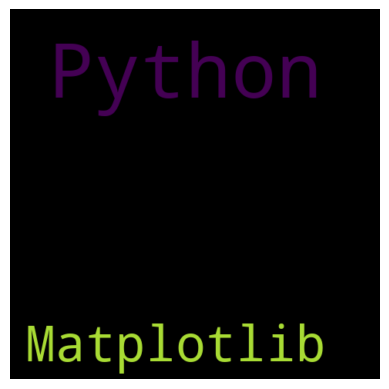

In [10]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Python Python Python Matplotlib")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()